In [2]:
import urllib.request, urllib.parse, urllib.error
import json
import pandas as pd
import numpy
from bs4 import BeautifulSoup
import ssl
import plotly
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import plotly.graph_objs as go
import plotly.express as px

# World Dataset

In [127]:
df_world=pd.read_csv('covid_19_data1.csv')

In [128]:
df_world.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [129]:
df_world=df_world.rename(columns={'Country/Region':'Country'})
df_world=df_world.rename(columns={'ObservationDate':'Date'})
df_world=df_world.rename(columns={'Province/State':'State'})

In [130]:
df_world.head()

SNo        Date      State         Country      Last Update  Confirmed  \
0    1  01/22/2020      Anhui  Mainland China  1/22/2020 17:00        1.0   
1    2  01/22/2020    Beijing  Mainland China  1/22/2020 17:00       14.0   
2    3  01/22/2020  Chongqing  Mainland China  1/22/2020 17:00        6.0   
3    4  01/22/2020     Fujian  Mainland China  1/22/2020 17:00        1.0   
4    5  01/22/2020      Gansu  Mainland China  1/22/2020 17:00        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [131]:
df_countries=df_world.groupby(['Country','Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries=df_countries.drop_duplicates(subset=['Country'])
df_countries=df_countries[df_countries['Confirmed']>0]

In [132]:
df_countries

Country        Date     SNo  Confirmed   Deaths  Recovered
7939       North Macedonia  05/04/2020   21343     1518.0     85.0      992.0
11503           Uzbekistan  05/04/2020   21396     2189.0     10.0     1405.0
6115                 Libya  05/04/2020   21316       63.0      3.0       23.0
6602        Mainland China  05/04/2020  665700    82881.0   4633.0    77853.0
3670                France  05/04/2020  236066   169583.0  25204.0    51476.0
...                    ...         ...     ...        ...      ...        ...
11507         Vatican City  03/09/2020    4507        1.0      0.0        0.0
8199             Palestine  03/09/2020    4322       22.0      0.0        0.0
8715   Republic of Ireland  03/08/2020    4067       21.0      0.0        0.0
7870         North Ireland  02/28/2020    2685        1.0      0.0        0.0
0               Azerbaijan  02/28/2020    2664        1.0      0.0        0.0

[213 rows x 6 columns]

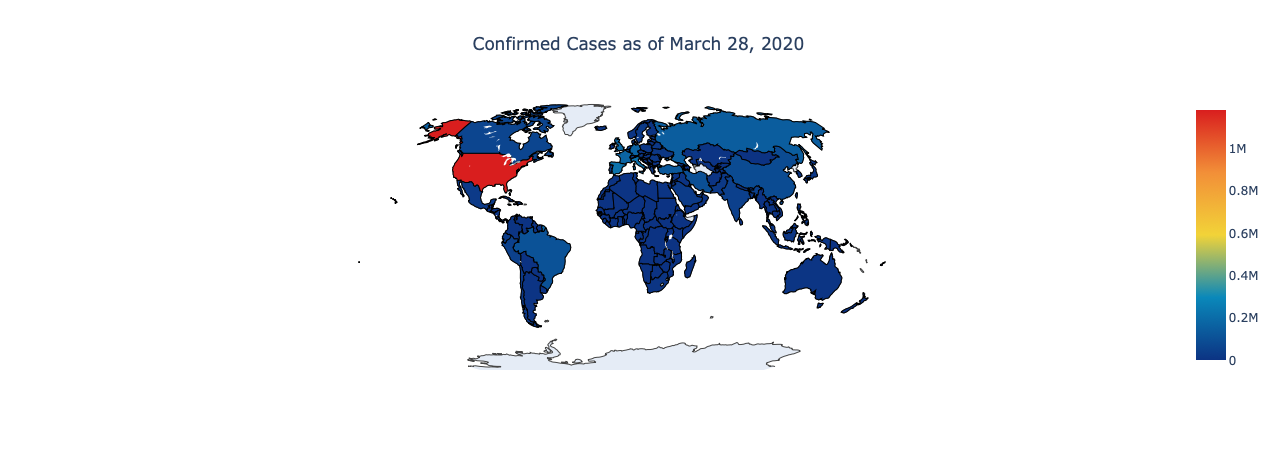

In [133]:
trace=go.Choropleth(locations=df_countries['Country'],
                   locationmode='country names',
                   z=df_countries['Confirmed'],
                   colorscale='Portland',
                   marker_line_color='black',
                    marker_line_width=1)
data=[trace]
fig=go.Figure(data=data)

fig.update_layout(
    title_text = 'Confirmed Cases as of March 28, 2020',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
        projection_type = 'robinson'
    )
)

## Animated Choropleth Map

In [134]:
df_countrydate= df_world[df_world['Confirmed']>0]
df_countrydate= df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate.head()

Date         Country  SNo  Confirmed  Deaths  Recovered
0  01/22/2020           Japan   36        2.0     0.0        0.0
1  01/22/2020           Macau   21        1.0     0.0        0.0
2  01/22/2020  Mainland China  373      547.0    17.0       28.0
3  01/22/2020     South Korea   38        1.0     0.0        0.0
4  01/22/2020          Taiwan   29        1.0     0.0        0.0

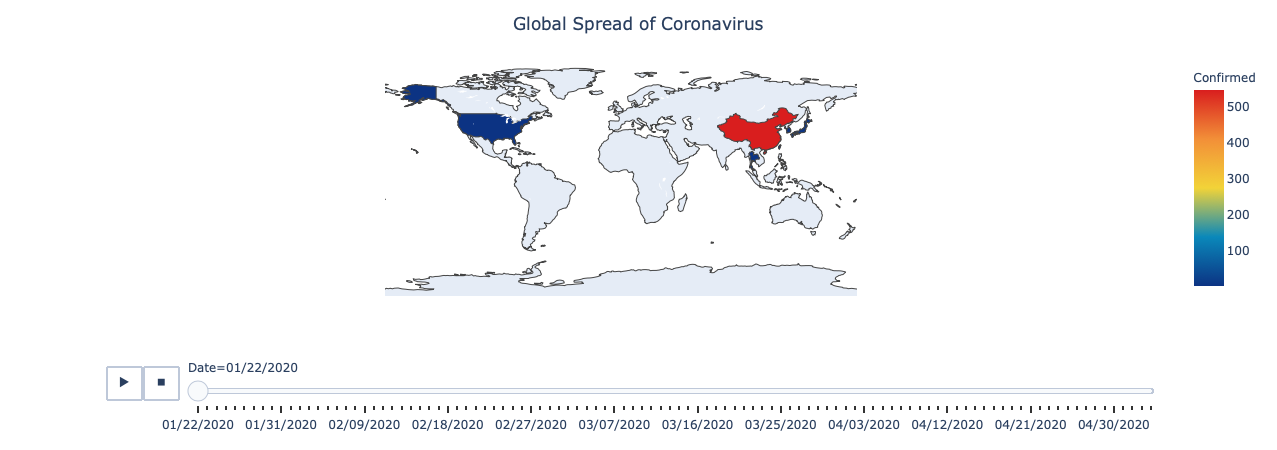

In [135]:
fig = px.choropleth(df_countrydate,
                    locations="Country", 
                    locationmode = "country names",
                    color="Confirmed",
                    color_continuous_scale="Portland",
                    hover_name="Country", 
                    animation_frame="Date"
                   )
fig.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
    ))
    
iplot(fig)

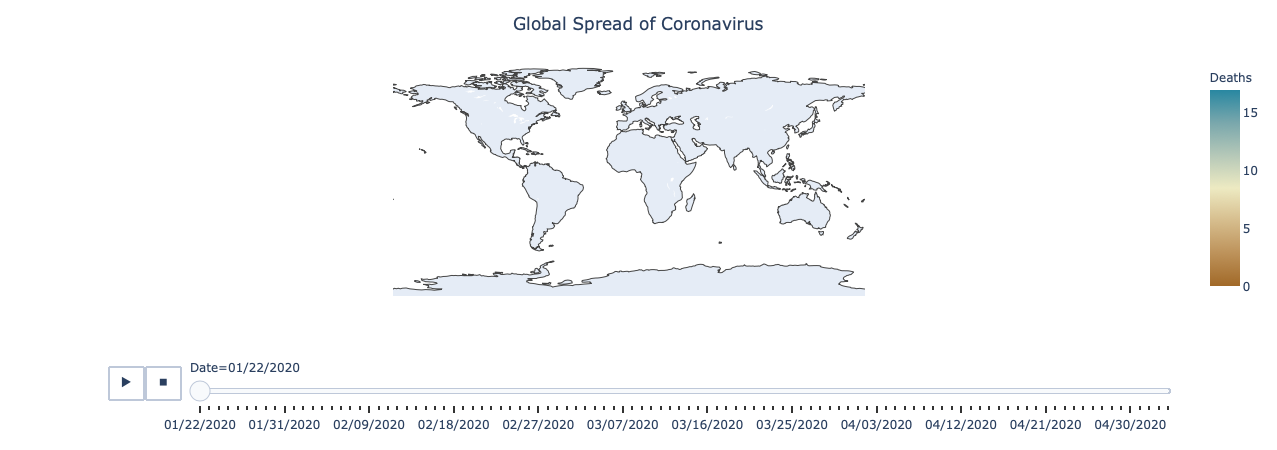

In [136]:
fig = px.scatter_geo(df_countrydate,
                    locations="Country", 
                    locationmode = "country names",
                    color="Deaths",
                    size='Confirmed',
                    opacity=0.7,
                    color_continuous_scale="Earth",
                    hover_name="Country", 
                    animation_frame="Date"
                   )
fig.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
    ))
    
iplot(fig)

## New World Dataset

In [137]:
df=pd.read_csv('covid_world.csv')
df.head()
df=df.drop(['FIPS','Admin2','Last_Update','Lat','Long_','Combined_Key'],axis=1)
df=df.rename(columns={'Country_Region':'Country'})
df=df.rename(columns={'Province_State':'State'})
df_top=df.groupby('Country').sum().sort_values('Confirmed',ascending=False).reset_index()
df_top

Country  Confirmed  Deaths  Recovered  Active
0                  US    1180375   68922     187180  954281
1               Spain     218011   25428     121343   71240
2               Italy     211938   29079      82879   99980
3      United Kingdom     191832   28809        910  162113
4              France     169583   25204      51476   92903
..                ...        ...     ...        ...     ...
182        Mauritania          8       1          6       1
183  Papua New Guinea          8       0          8       0
184            Bhutan          7       0          5       2
185    Western Sahara          6       0          5       1
186           Comoros          3       0          0       3

[187 rows x 5 columns]

In [138]:
df_top10=df_top.head(10)

## Top 10 Countries

### Deaths vs Recoveries

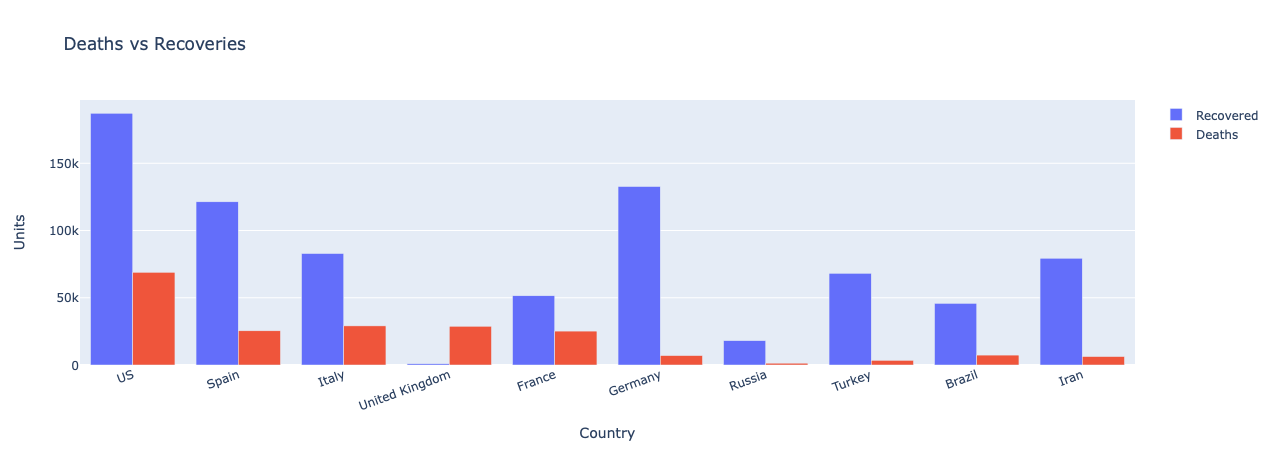

In [139]:
trace1=go.Bar(x=df_top10.Country,
            y=df_top10.Recovered,
             name='Recovered')

trace2=go.Bar(x=df_top10.Country,
              y=df_top10.Deaths,
              name="Deaths")

data=[trace1,trace2]

layout={'title':'Deaths vs Recoveries',
       'xaxis':{'title':'Country', 'tickangle':-20},
       'yaxis':{'title':'Units'},
       'barmode':'group'}

iplot({'data':data, 'layout':layout})

### Confirmed Cases

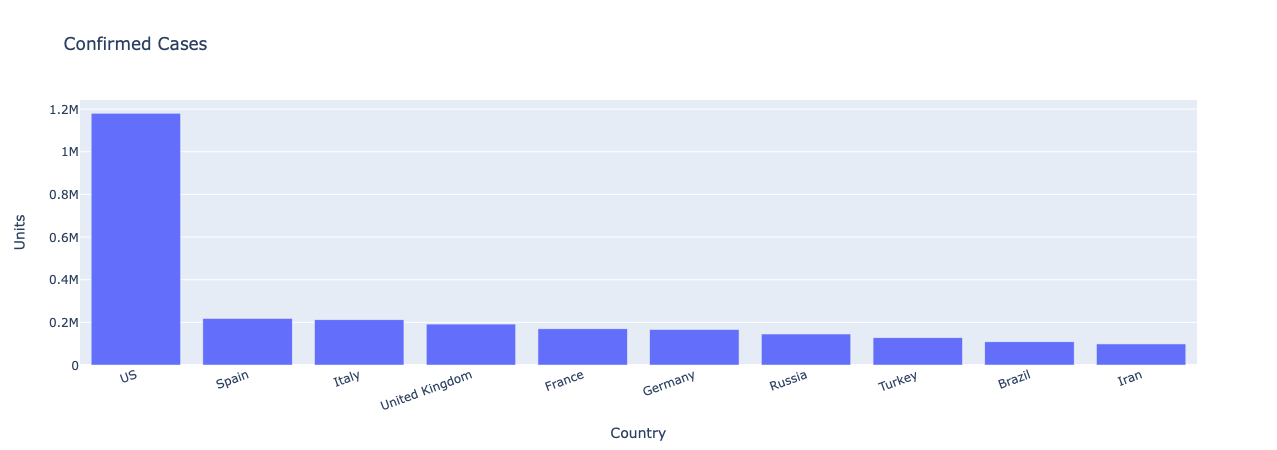

In [140]:
trace=go.Bar(x=df_top10.Country,
            y=df_top10.Confirmed)

data=[trace]
layout={'title':'Confirmed Cases',
       'xaxis':{'title':'Country', 'tickangle':-20},
       'yaxis':{'title':'Units'}}

iplot({'data':data,'layout':layout})


## Proportion of confirmed Cases by Country

In [141]:
# df_top16=df_top.head(16)
# fig = px.pie(df_top16, values = 'Confirmed',names='Country', height=600)
# fig.update_traces(textposition='inside', textinfo='percent+label')

# fig.update_layout(
#     title_x = 0.5,
#     geo=dict(
#         showframe = False,
#         showcoastlines = False,
#     ))

# iplot(fig)

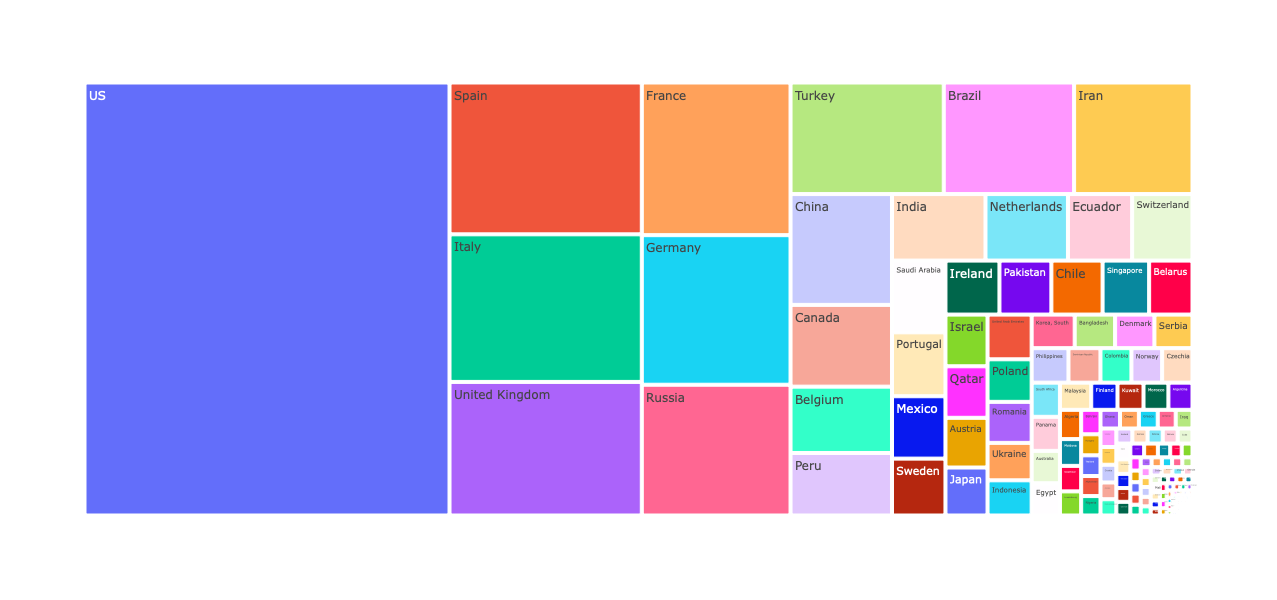

In [142]:
fig = px.treemap(df_top, path=['Country'], values='Confirmed', height=600, width=1000)

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

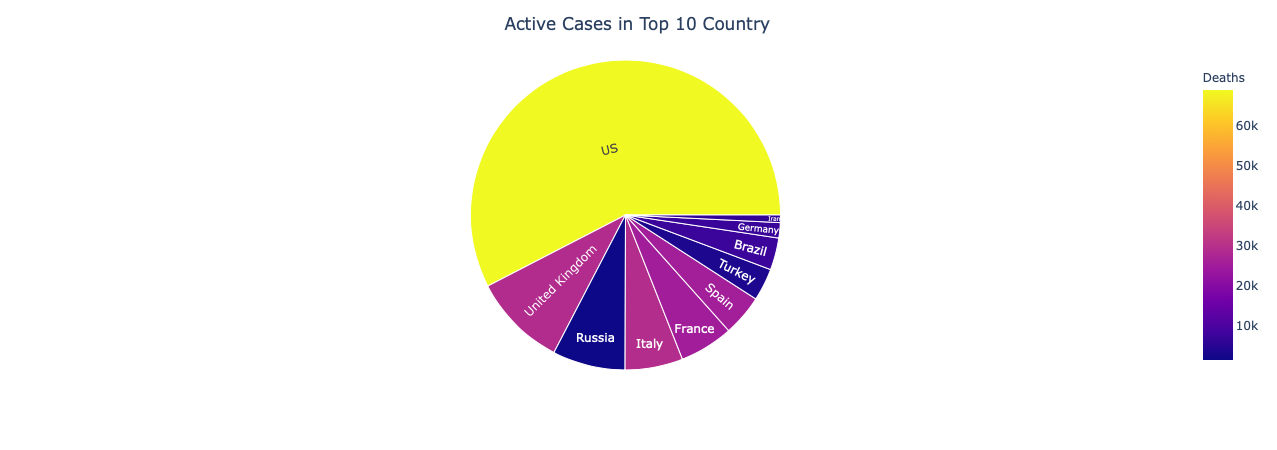

In [143]:
fig = px.sunburst(df_top10, path=['Country'], values='Active', color='Deaths')
fig.update_layout(
    title="Active Cases in Top 10 Country",
    title_x = 0.5,)

fig.show()

# India

In [23]:
url='https://api.covid19india.org/csv/latest/case_time_series.csv'
context = ssl._create_unverified_context()
data=urllib.request.urlopen(url, context=context)

In [24]:
df_india=pd.read_csv(data)

In [25]:
df_india

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0    30 January                 1                1                0   
1    31 January                 0                1                0   
2   01 February                 0                1                0   
3   02 February                 1                2                0   
4   03 February                 1                3                0   
..           ...              ...              ...              ...   
91     30 April              1801            34866              630   
92       01 May              2396            37262              962   
93       02 May              2564            39826              831   
94       03 May              2952            42778              911   
95       04 May              3656            46434             1082   

    Total Recovered  Daily Deceased  Total Deceased  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0  
..              ...             ...             ...  
91             9059              75            1154  
92            10021              77            1231  
93            10852              92            1323  
94            11763             140            1463  
95            12845             103            1566  

[96 rows x 7 columns]

In [26]:
df_india.head()

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0   30 January                 1                1                0   
1   31 January                 0                1                0   
2  01 February                 0                1                0   
3  02 February                 1                2                0   
4  03 February                 1                3                0   

   Total Recovered  Daily Deceased  Total Deceased  
0                0               0               0  
1                0               0               0  
2                0               0               0  
3                0               0               0  
4                0               0               0

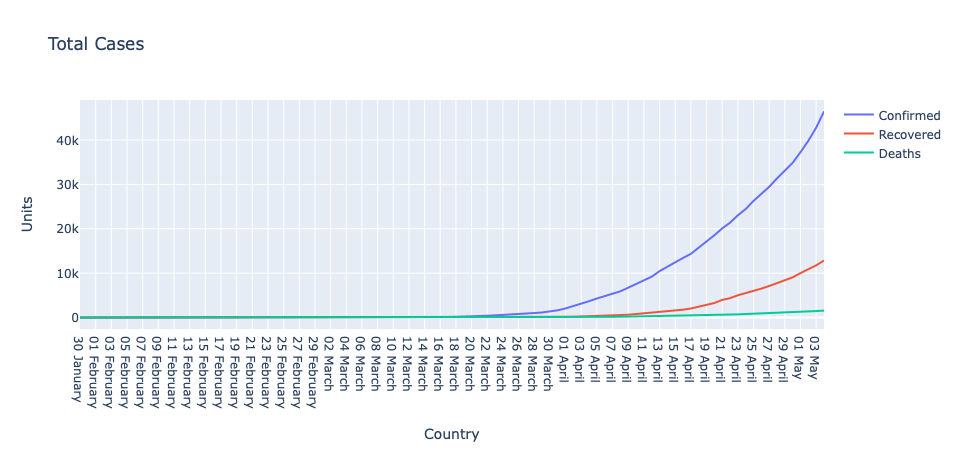

In [27]:
trace1=go.Scatter(x=df_india.Date,
                 y=df_india['Total Confirmed'],
                mode='lines',
                 name='Confirmed')

trace2=go.Scatter(x=df_india.Date,
                 y=df_india['Total Recovered'],
                mode='lines',
                 name='Recovered')

trace3=go.Scatter(x=df_india.Date,
                 y=df_india['Total Deceased'],
                mode='lines',
                 name='Deaths')


data=[trace1,trace2,trace3]

layout={'title':'Total Cases',
       'xaxis':{'title':'Country'},
       'yaxis':{'title':'Units'}}

fig=go.Figure(data=data, layout=layout)

iplot(fig)

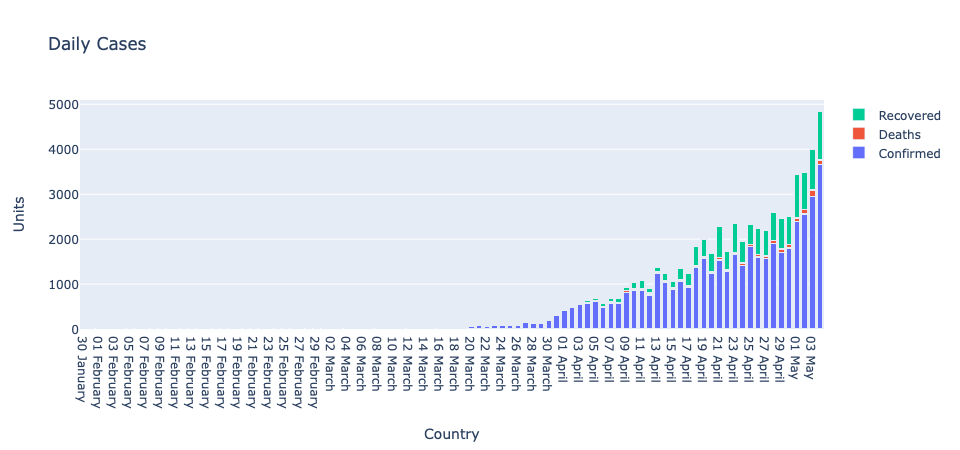

In [28]:
trace1=go.Bar(x=df_india.Date,
            y=df_india['Daily Confirmed'],
             name='Confirmed')

trace2=go.Bar(x=df_india.Date,
            y=df_india['Daily Deceased'],
             name='Deaths')

trace3=go.Bar(x=df_india.Date,
            y=df_india['Daily Recovered'],
             name='Recovered')

data=[trace1,trace2,trace3]
layout={'title':'Daily Cases',
       'xaxis':{'title':'Country'},
       'yaxis':{'title':'Units'},
       'barmode':'stack'}

iplot({'data':data,'layout':layout})

In [29]:
url='https://api.covid19india.org/csv/latest/raw_data2.csv'
context = ssl._create_unverified_context()
data=urllib.request.urlopen(url, context=context)
df_gender_age=pd.read_csv(data)
df_gender_age

Patient Number State Patient Number Date Announced  \
0               17307                  NaN     20/04/2020   
1               17308                  NaN     20/04/2020   
2               17309                  NaN     20/04/2020   
3               17310                  NaN     20/04/2020   
4               17311                  NaN     20/04/2020   
...               ...                  ...            ...   
10580           27887                  NaN     26/04/2020   
10581           27888                  NaN     26/04/2020   
10582           27889                  NaN     26/04/2020   
10583           27890                  NaN     26/04/2020   
10584           27891                  NaN     26/04/2020   

       Estimated Onset Date  Age Bracket Gender Detected City  \
0                       NaN         48.0      M           NaN   
1                       NaN         55.0      M           NaN   
2                       NaN         57.0      M           NaN   
3                       NaN         58.0      M           NaN   
4                       NaN         66.0      M           NaN   
...                     ...          ...    ...           ...   
10580                   NaN          NaN    NaN           NaN   
10581                   NaN          NaN    NaN           NaN   
10582                   NaN         12.0      F           NaN   
10583                   NaN         13.0      F           NaN   
10584                   NaN         17.0      F           NaN   

      Detected District Detected State State code Current Status  \
0               Bhadrak         Odisha         OR   Hospitalized   
1               Bhadrak         Odisha         OR   Hospitalized   
2               Bhadrak         Odisha         OR   Hospitalized   
3               Bhadrak         Odisha         OR   Hospitalized   
4               Bhadrak         Odisha         OR   Hospitalized   
...                 ...            ...        ...            ...   
10580               NaN          Delhi         DL   Hospitalized   
10581               NaN    Uttarakhand         UT   Hospitalized   
10582            Munger          Bihar         BR   Hospitalized   
10583            Munger          Bihar         BR   Hospitalized   
10584            Munger          Bihar         BR   Hospitalized   

                 Notes Contracted from which Patient (Suspected) Nationality  \
0      Details awaited                                       NaN         NaN   
1      Details awaited                                       NaN         NaN   
2      Details awaited                                       NaN         NaN   
3      Details awaited                                       NaN         NaN   
4      Details awaited                                       NaN         NaN   
...                ...                                       ...         ...   
10580  Details awaited                                       NaN         NaN   
10581  Details awaited                                       NaN         NaN   
10582  Details awaited                                       NaN         NaN   
10583  Details awaited                                       NaN         NaN   
10584  Details awaited                                       NaN         NaN   

      Type of transmission Status Change Date  \
0                      NaN         20/04/2020   
1                      NaN         20/04/2020   
2                      NaN         20/04/2020   
3                      NaN         20/04/2020   
4                      NaN         20/04/2020   
...                    ...                ...   
10580                  NaN         26/04/2020   
10581                  NaN         26/04/2020   
10582                  NaN         26/04/2020   
10583                  NaN         26/04/2020   
10584                  NaN         26/04/2020   

                                                Source_1 Source_2 Source_3  \
0      https://twitter.com/the_hindu/status/1252

In [30]:
df_gender_age=df_gender_age.drop(['State Patient Number','Estimated Onset Date','Notes','Nationality','Type of transmission','Status Change Date','Source_1','Source_2','Source_3','Backup Notes'],axis=1)

In [31]:
df_gender=df_gender_age.groupby('Gender').count()
df_gender['Count']=df_gender['Patient Number']

df_gender

Patient Number  Date Announced  Age Bracket  Detected City  \
Gender                                                               
F                  543             543          247             69   
M                 1024            1024          428             97   

        Detected District  Detected State  State code  Current Status  \
Gender                                                                  
F                     543             543         543             543   
M                    1023            1024        1024            1024   

        Contracted from which Patient (Suspected)  Count  
Gender                                                    
F                                              36    543  
M                                              63   1024

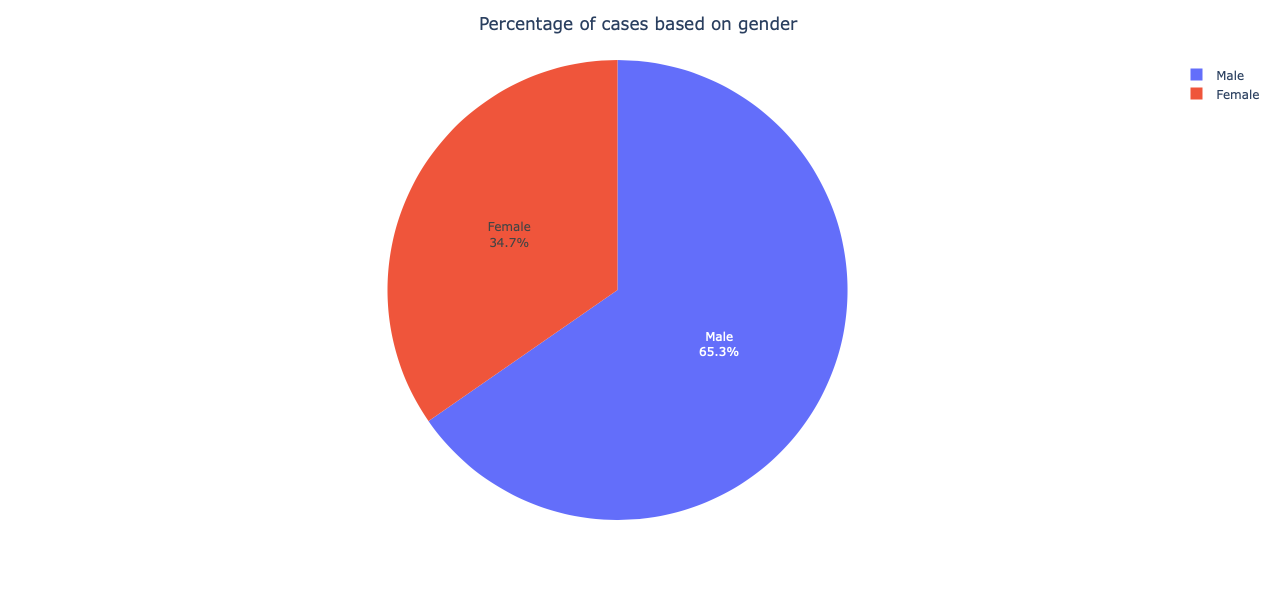

In [32]:
fig = px.pie(df_gender, values = 'Count',names=['Female','Male'], height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title='Percentage of cases based on gender',
    title_x = 0.5)

iplot(fig)

In [33]:
df_age=df_gender_age.groupby('Age Bracket').count()
df_age

Patient Number  Date Announced  Gender  Detected City  \
Age Bracket                                                          
0.3                       1               1       1              1   
0.4                       1               1       1              0   
1.0                       1               1       1              0   
2.0                       2               2       2              0   
3.0                       1               1       1              0   
...                     ...             ...     ...            ...   
80.0                      3               3       3              0   
85.0                      1               1       1              1   
88.0                      1               1       1              0   
90.0                      1               1       1              0   
98.0                      1               1       1              0   

             Detected District  Detected State  State code  Current Status  \
Age Bracket                                                                  
0.3                          1               1           1               1   
0.4                          1               1           1               1   
1.0                          1               1           1               1   
2.0                          2               2           2               2   
3.0                          1               1           1               1   
...                        ...             ...         ...             ...   
80.0                         3               3           3               3   
85.0                         1               1           1               1   
88.0                         1               1           1               1   
90.0                         1               1           1               1   
98.0                         1               1           1               1   

             Contracted from which Patient (Suspected)  
Age Bracket                                             
0.3                                                  0  
0.4                                                  1  
1.0                                                  0  
2.0                                                  0  
3.0                                                  0  
...                                                ...  
80.0                                                 1  
85.0                                                 1  
88.0                                                 0  
90.0                                                 1  
98.0                                                 0  

[81 rows x 9 columns]

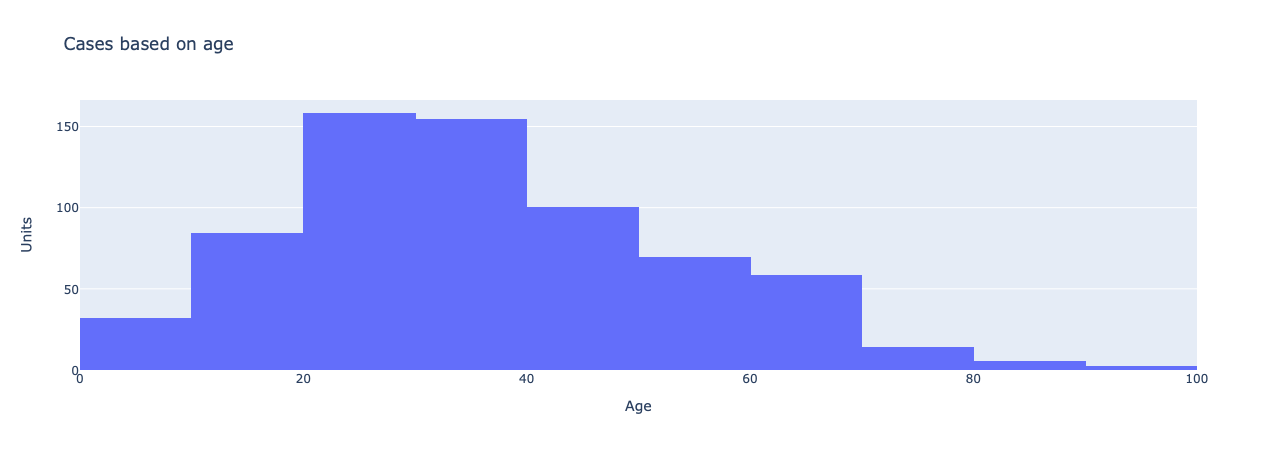

In [34]:
trace=go.Histogram(x=df_gender_age['Age Bracket'],
                   xbins=dict(start=0, end=100, size=10))
                   

data=[trace]

layout={'title':'Cases based on age',
       'xaxis':{'title':'Age'},
       'yaxis':{'title':'Units'}}

iplot({'data':data, 'layout':layout})

## India State Analysis

In [35]:
url='https://api.covid19india.org/csv/latest/state_wise.csv'
context = ssl._create_unverified_context()
data=urllib.request.urlopen(url, context=context)
df_states=pd.read_csv(data)
df_states

State  Confirmed  Recovered  Deaths  Active  \
0                         Total      46888      12977    1575   32332   
1                   Maharashtra      14541       2465     583   11493   
2                       Gujarat       5804       1195     319    4290   
3                         Delhi       4898       1431      64    3403   
4                    Tamil Nadu       3550       1409      31    2110   
5                     Rajasthan       3127       1464      82    1581   
6                Madhya Pradesh       2942        856     165    1921   
7                 Uttar Pradesh       2766        802      50    1914   
8                Andhra Pradesh       1717        589      34    1094   
9                   West Bengal       1259        218     133     908   
10                       Punjab       1451        133      25    1293   
11                    Telangana       1085        585      29     471   
12            Jammu and Kashmir        741        320       8     413   
13                    Karnataka        673        331      28     313   
14                        Bihar        535        134       4     397   
15                      Haryana        548        256       6     286   
16                       Kerala        503        462       4      37   
17                       Odisha        174         60       1     113   
18                    Jharkhand        119         27       3      89   
19                   Chandigarh        115         21       1      93   
20                  Uttarakhand         61         39       1      21   
21                 Chhattisgarh         58         36       0      22   
22                        Assam         44         33       1      10   
23                       Ladakh         42         17       0      25   
24             Himachal Pradesh         41         34       2       2   
25  Andaman and Nicobar Islands         33         32       0       1   
26                      Tripura         29          2       0      27   
27                    Meghalaya         12         10       1       1   
28                   Puducherry          9          6       0       3   
29                          Goa          7          7       0       0   
30                      Manipur          2          2       0       0   
31                      Mizoram          1          0       0       1   
32            Arunachal Pradesh          1          1       0       0   
33                     Nagaland          0          0       0       0   
34       Dadra and Nagar Haveli          0          0       0       0   
35                Daman and Diu          0          0       0       0   
36                  Lakshadweep          0          0       0       0   
37                       Sikkim          0          0       0       0   

      Last_Updated_Time State_code  Delta_Confirmed  Delta_Recovered  \
0   05/05/2020 19:20:45         TT              454              132   
1   05/05/2020 13:12:46         MH                0                0   
2   04/05/2020 20:32:45         GJ                0                0   
3   04/05/2020 22:22:48         DL                0                0   
4   04/05/2020 18:16:46         TN                0                0   
5   05/05/2020 14:41:46         RJ               66               26   
6   05/05/2020 03:27:46         MP                0                0   
7   05/05/2020 00:14:46         UP                0                0   
8   05/05/2020 11:52:46         AP               67               65   
9   04/05/2020 21:08:47         WB                0                0   
10  05/05/2020 17:52:46         PB              219                5   
11  04/05/2020 20:32:46         TG                0                0   
12  05/05/2020 19:02:46         JK               15               17   
13  05/05/2020 18:22:46         KA               22               10   
14  05/05/2020 17:52:47         BR                7                7   
15  05/05/2020 19:20:46   

In [36]:
df_states=df_states.drop(['Delta_Confirmed','Delta_Recovered', 'Delta_Deaths','State_Notes'], axis=1)

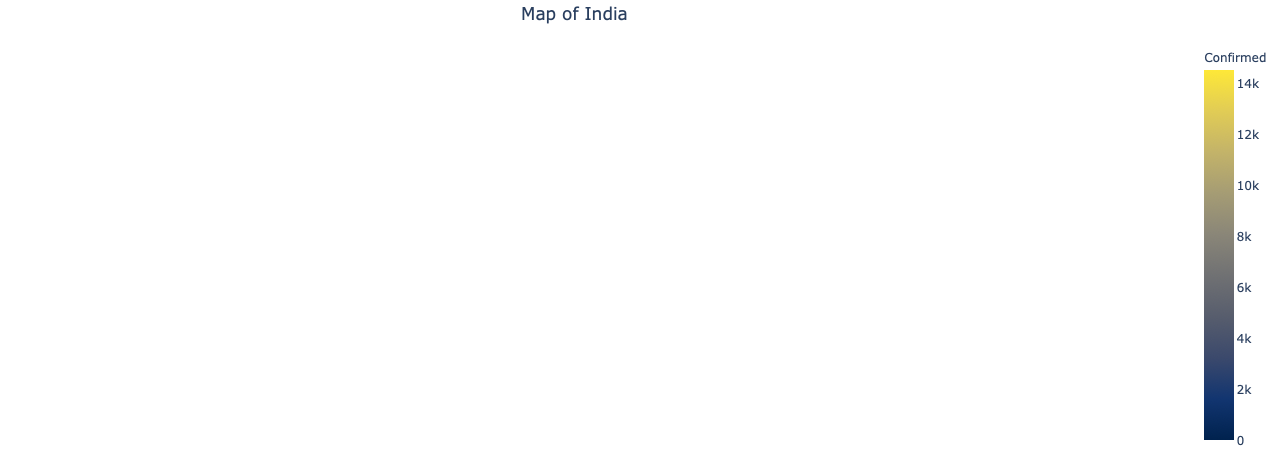

In [123]:
# from urllib.request import urlopen
# import json
# context = ssl._create_unverified_context()
# with urlopen('https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States',context=context) as response:
#     india= json.load(response)

# india['features'][1]


with open('india-2.json') as file:
    india=json.load(file)
    

fig = px.choropleth_mapbox(df_states, geojson=india, color="Confirmed",
                           locations="State", featureidkey="properties.st_nm",
                           center={"lat": 22.9734, "lon": 78.962},
                           color_continuous_scale='cividis',
                           mapbox_style="white-bg", zoom=3)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                 title='Map of India',
                 title_x=0.45)
fig.update_geos(fitbounds="locations", visible=False)
iplot(fig)


# fig = go.Figure(go.Choroplethmapbox(geojson=india,locations=df_states.State,z=df_states.Confirmed,
#                                     colorscale='Cividis',
#                                     featureidkey="properties.NAME_1",
#                                     marker_opacity=0.5, marker_line_width=0))
# fig.update_layout(mapbox_style="carto-positron",
#                   mapbox_zoom=3, mapbox_center = {"lat": 20.5937, "lon": 78.9629})

# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

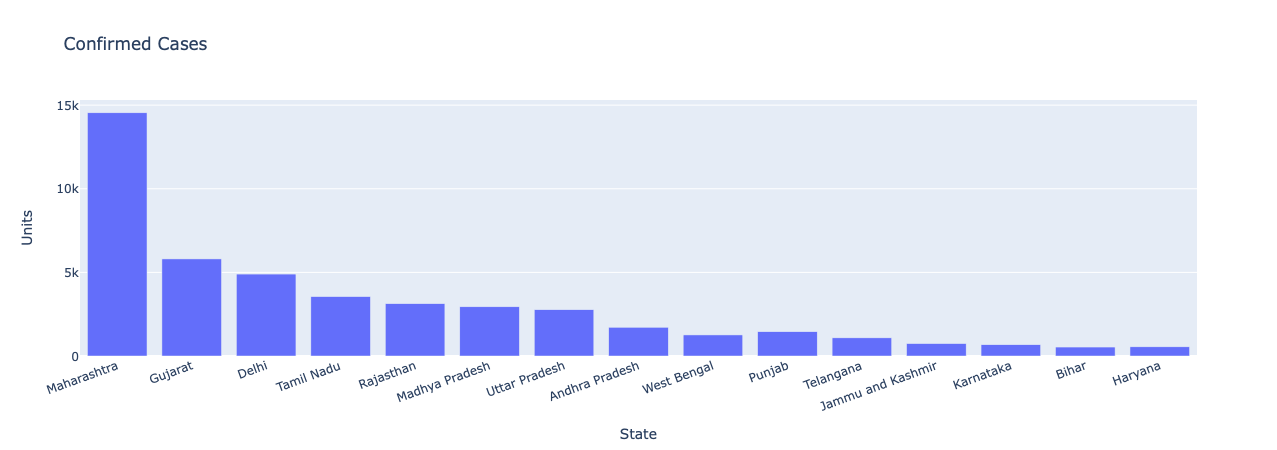

In [39]:
df_states=df_states[df_states['State']!='Total']
df_states15=df_states[df_states['Confirmed']>0].head(15)
trace=go.Bar(x=df_states15.State,
            y=df_states15.Confirmed)

data=[trace]
layout={'title':'Confirmed Cases',
       'xaxis':{'title':'State', 'tickangle':-20},
       'yaxis':{'title':'Units'}}

iplot({'data':data,'layout':layout})

## India Districts analysis

In [41]:
url='https://api.covid19india.org/csv/latest/district_wise.csv'
context = ssl._create_unverified_context()
data=urllib.request.urlopen(url, context=context)
df_city=pd.read_csv(data)
df_city

SlNo State_Code           State     District_Key      District  \
0       0         AS           Assam   AS_Other State   Other State   
1       0         HR         Haryana      HR_Italians      Italians   
2       0         MH     Maharashtra  MH_Other States  Other States   
3       0         MP  Madhya Pradesh  MP_Other Region  Other Region   
4       0         RJ       Rajasthan      RJ_Evacuees      Evacuees   
..    ...        ...             ...              ...           ...   
777   760         TG       Telangana       TG_Unknown       Unknown   
778   761         TR         Tripura       TR_Unknown       Unknown   
779   762         UP   Uttar Pradesh       UP_Unknown       Unknown   
780   763         UT     Uttarakhand       UT_Unknown       Unknown   
781   764         WB     West Bengal       WB_Unknown       Unknown   

     Confirmed  Active  Recovered  Deceased  Delta_Confirmed  Delta_Active  \
0            1     0.0          1         0                0             0   
1           14     0.0         14         0                0             0   
2           29    24.0          0         5                0             0   
3            2     2.0          0         0                0             0   
4           61     0.0         61         0                0            -9   
..         ...     ...        ...       ...              ...           ...   
777         29     NaN        234         1                0             0   
778          0     NaN          0         0                0             0   
779          0     NaN          0         0                0             0   
780          0     NaN          0         0                0             0   
781          0     NaN          0         0                0             0   

     Delta_Recovered  Delta_Deceased  \
0                  0               0   
1                  0               0   
2                  0               0   
3                  0               0   
4                  9               0   
..               ...             ...   
777                0               0   
778                0               0   
779                0               0   
780                0               0   
781                0               0   

                                        District_Notes  
0                        Case tranferred from Nagaland  
1         Italian tourists who were treated in Haryana  
2                          Cases from other States/UTs  
3                              Cases from other states  
4    Evacuees from other countries; They have been ...  
..                                                 ...  
777                                                NaN  
778                                                NaN  
779                                                NaN  
780                                                NaN  
781                                                NaN  

[782 rows x 14 columns]

In [42]:
df_district=df_city.drop(['SlNo','District_Key','Delta_Confirmed','Delta_Recovered','Delta_Active','Delta_Deceased','District_Notes'],axis=1)

In [43]:
df_district.head()

State_Code           State      District  Confirmed  Active  Recovered  \
0         AS           Assam   Other State          1     0.0          1   
1         HR         Haryana      Italians         14     0.0         14   
2         MH     Maharashtra  Other States         29    24.0          0   
3         MP  Madhya Pradesh  Other Region          2     2.0          0   
4         RJ       Rajasthan      Evacuees         61     0.0         61   

   Deceased  
0         0  
1         0  
2         5  
3         0  
4         0

In [44]:
df_cities=df_district.groupby('District').sum().sort_values('Confirmed',ascending=False).reset_index()
df_cities=df_cities[df_cities['District']!='Unknown']
df_cities

District  Confirmed  Active  Recovered  Deceased
0       Mumbai       9310  7554.0       1395       361
2    Ahmedabad       4076  3222.0        620       234
3         Pune       2018  1480.0        425       113
4      Chennai       1729  1444.0        267        18
5       Indore       1611  1172.0        362        77
..         ...        ...     ...        ...       ...
732     Khowai          0     0.0          0         0
733    Raigarh          0     0.0          0         0
734       Doda          0     0.0          0         0
735      Boudh          0     0.0          0         0
736  Zunheboto          0     0.0          0         0

[736 rows x 5 columns]

In [45]:
df_city10=df_cities[df_cities['District']!='Unknown']
df_city10=df_city10[df_city10['Confirmed']>0].head(10)
df_city10

District  Confirmed  Active  Recovered  Deceased
0      Mumbai       9310  7554.0       1395       361
2   Ahmedabad       4076  3222.0        620       234
3        Pune       2018  1480.0        425       113
4     Chennai       1729  1444.0        267        18
5      Indore       1611  1172.0        362        77
6       Thane       1238   932.0        285        21
7      Jaipur       1041   546.0        446        49
8     Jodhpur        744   531.0        203        10
9       Surat        706   469.0        206        31
10    Kolkata        659   463.0        109        87

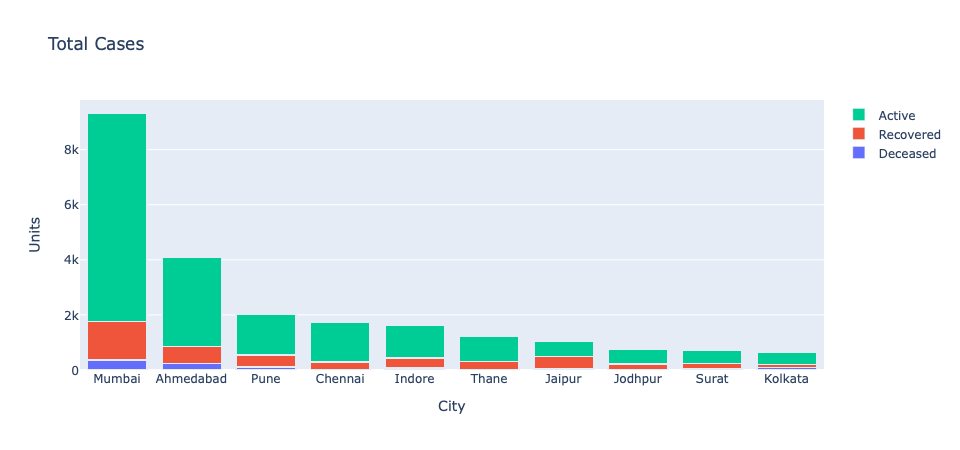

In [46]:
trace1=go.Bar(x=df_city10.District,
                 y=df_city10['Deceased'],
                 name='Deceased')

trace2=go.Bar(x=df_city10.District,
                 y=df_city10['Recovered'],
                 name='Recovered')
trace3=go.Bar(x=df_city10.District,
                 y=df_city10['Active'],
                 name='Active')


data=[trace1,trace2,trace3]

layout={'title':'Total Cases',
       'xaxis':{'title':'City'},
       'yaxis':{'title':'Units'},
       'barmode':'stack'}

fig=go.Figure(data=data,layout=layout)

iplot(fig)

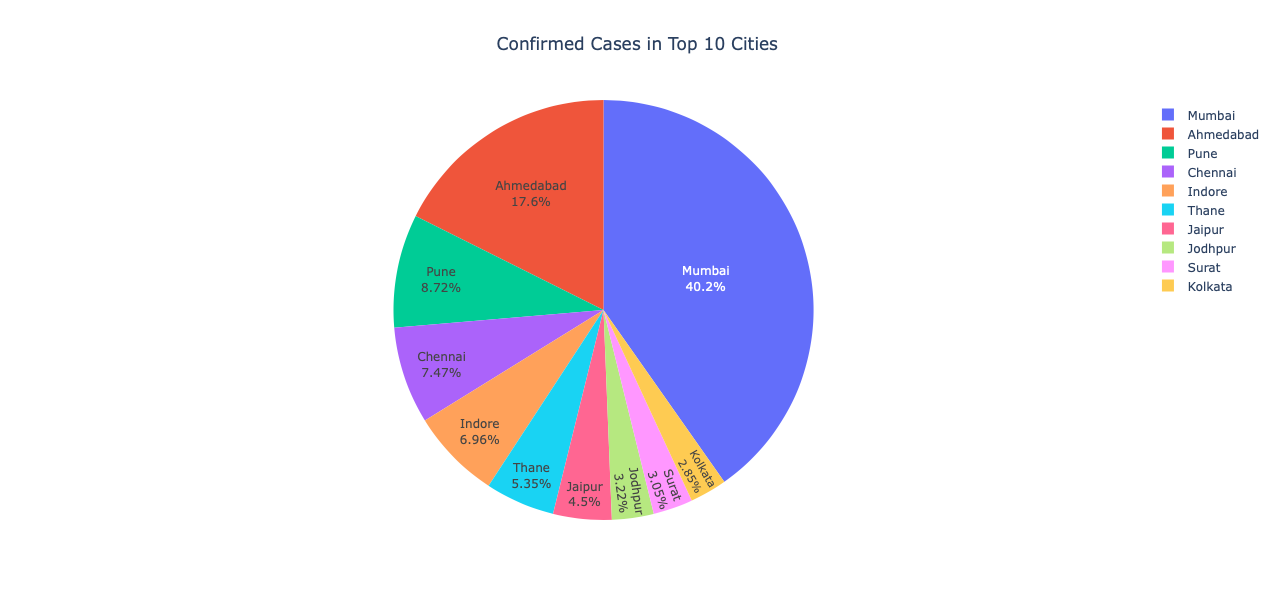

In [124]:
fig = px.pie(df_city10, values = 'Confirmed',names='District', height=600,title='Confirmed Cases in Top 10 Cities ')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,)

fig.show()

In [48]:
df_up=pd.read_csv('UP.csv')
df_up

District  Active Cases  Recovered  Deaths  Total
0                         Agra           392         91      14    497
1                 Kanpur Nagar           201         17       4    222
2                      Lucknow           144         69       1    214
3                   Saharanpur           176         16       0    192
4   Gautam Buddh Nagar (Noida)            65         90       0    155
..                         ...           ...        ...     ...    ...
57                   Barabanki             0          1       0      1
58                     Bhadohi             1          0       0      1
59                      Deoria             1          0       0      1
60                         Mau             1          0       0      1
61                Shahjahanpur             0          1       0      1

[62 rows x 5 columns]

In [49]:
df_up10=df_up.head(10)
df_up10

District  Active Cases  Recovered  Deaths  Total
0                        Agra           392         91      14    497
1                Kanpur Nagar           201         17       4    222
2                     Lucknow           144         69       1    214
3                  Saharanpur           176         16       0    192
4  Gautam Buddh Nagar (Noida)            65         90       0    155
5                   Firozabad            99         23       2    124
6                   Moradabad            62         41       7    110
7                      Meerut            48         52       5    105
8                   Ghaziabad            20         44       1     65
9                    Varanasi            52          8       1     61

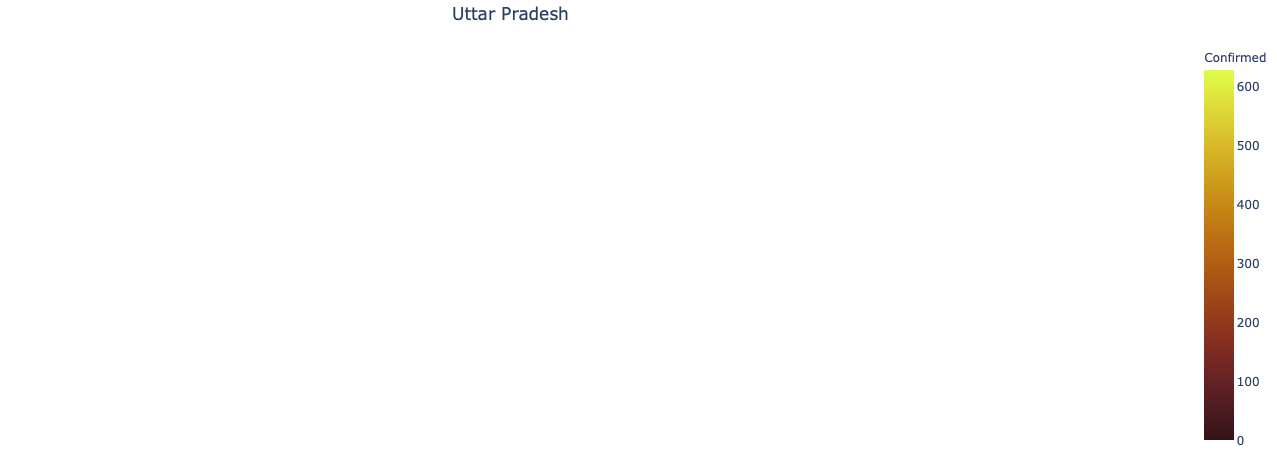

In [122]:
df_upd=df_district[df_district['State']=='Uttar Pradesh']

with open('up_district.json') as file:
    mh=json.load(file)

fig = px.choropleth_mapbox(df_upd, geojson=mh, color="Confirmed",
                           locations="District", featureidkey="properties.district",
                           center={"lat": 26.8467, "lon":80.9462},
                           color_continuous_scale='solar',
                           mapbox_style="white-bg", zoom=5)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                 title='Uttar Pradesh',
                 title_x=0.4)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

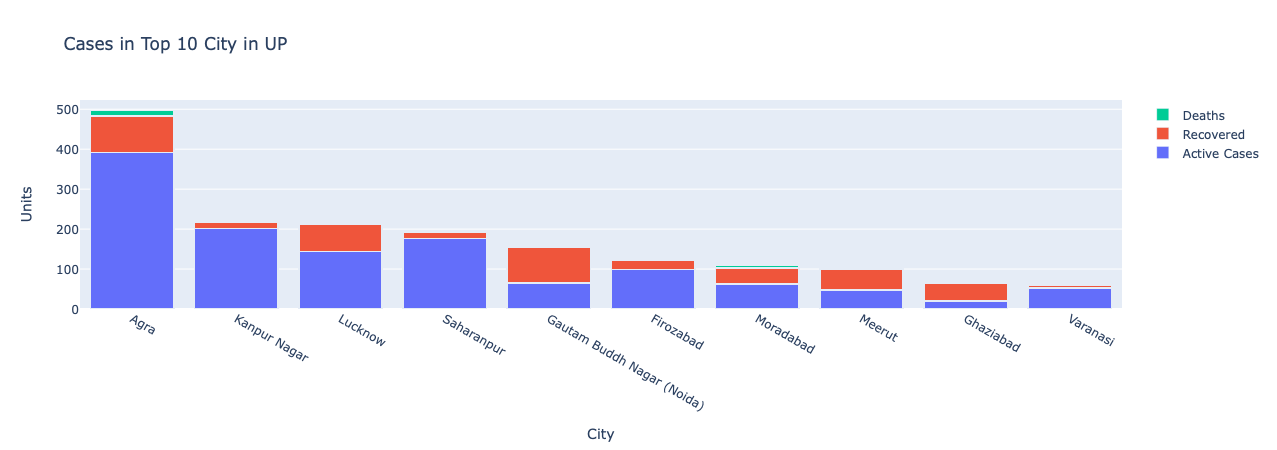

In [51]:
trace1=go.Bar(x=df_up10.District,
                 y=df_up10['Deaths'],
                 name='Deaths')

trace2=go.Bar(x=df_up10.District,
                 y=df_up10['Recovered'],
                 name='Recovered')
trace3=go.Bar(x=df_up10.District,
                 y=df_up10['Active Cases'],
                 name='Active Cases')


data=[trace3,trace2,trace1]

layout={'title':'Cases in Top 10 City in UP',
       'xaxis':{'title':'City'},
       'yaxis':{'title':'Units'},
       'barmode':'stack'}

fig=go.Figure(data=data,layout=layout)

iplot(fig)

In [52]:
df_mh= pd.read_csv('Maharashtra.csv')
df_mh

District Confirmed  Recovered  Deaths
0         Mumbai     7,764       1162     290
1           Pune     1,192        244      85
2         Nashik       195          6      12
3         Nagpur       138         35       2
4     Aurangabad       104         22       7
5        Solapur       111         10       6
6       Yavatmal        79         10       0
7     Ahmednagar        42         23       2
8        Jalgaon        40          1       9
9          Akola        39          8       1
10        Satara        32          8       2
11        Sangli        29         25       1
12      Amravati        28          4       7
13         Dhule        25          0       3
14      Buldhana        21         17       1
15       Hingoli        15          1       0
16      Kolhapur        12          4       0
17         Latur        12          8       1
18     Nandurbar        11          0       1
19     Ratnagiri         8          5       1
20        Nanded         3          0       0
21     Osmanabad         3          3       0
22    Chandrapur         2          2       0
23         Jalna         2          0       0
24    Sindhudurg         2          1       0
25        Washim         2          1       0
26          Beed         1          1       0
27      Bhandara         1          0       0
28        Gondia         1          1       0
29      Parbhani         1          1       0
30  Other states        25          0       2

In [53]:
df_mh10=df_mh.head(10)
df_mh10

District Confirmed  Recovered  Deaths
0      Mumbai     7,764       1162     290
1        Pune     1,192        244      85
2      Nashik       195          6      12
3      Nagpur       138         35       2
4  Aurangabad       104         22       7
5     Solapur       111         10       6
6    Yavatmal        79         10       0
7  Ahmednagar        42         23       2
8     Jalgaon        40          1       9
9       Akola        39          8       1

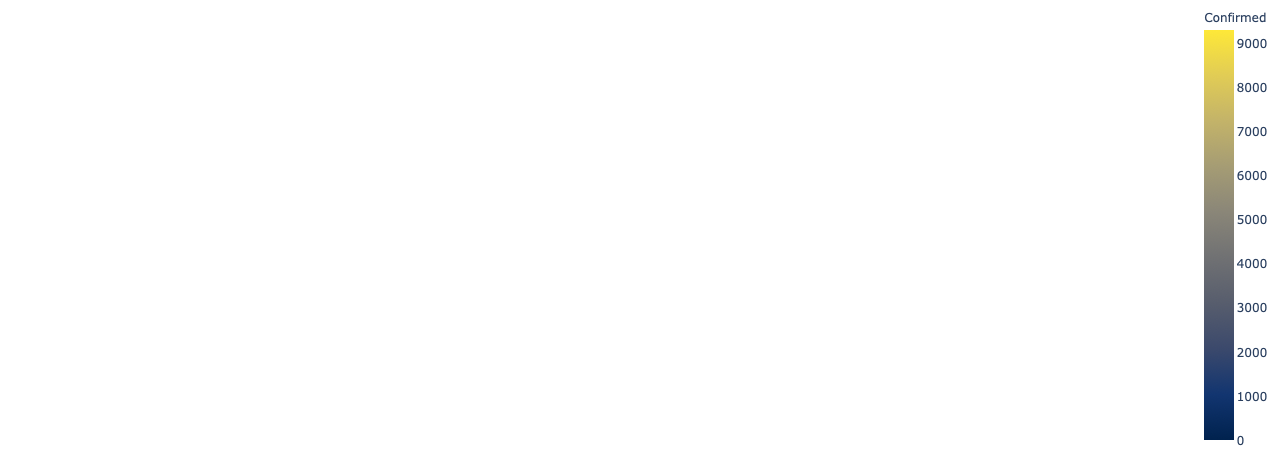

In [121]:
df_mhd=df_district[df_district['State']=='Maharashtra']

with open('maharashtra_district.json') as file:
    mh=json.load(file)

fig = px.choropleth_mapbox(df_mhd, geojson=mh, color="Confirmed",
                           locations="District", featureidkey="properties.district",
                           center={"lat": 19.7515, "lon": 75.7139},
                           color_continuous_scale='cividis',
                           mapbox_style="white-bg", zoom=5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

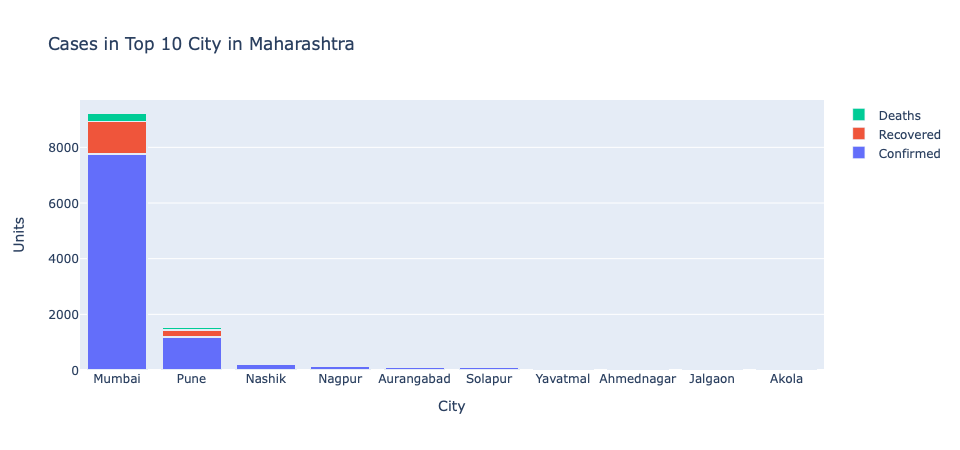

In [54]:
trace1=go.Bar(x=df_mh10.District,
                 y=df_mh10['Deaths'],
                 name='Deaths')

trace2=go.Bar(x=df_mh10.District,
                 y=df_mh10['Recovered'],
                 name='Recovered')
trace3=go.Bar(x=df_mh10.District,
                 y=df_mh10['Confirmed'],
                 name='Confirmed')


data=[trace3,trace2,trace1]

layout={'title':'Cases in Top 10 City in Maharashtra',
       'xaxis':{'title':'City'},
       'yaxis':{'title':'Units'},
       'barmode':'stack'}

fig=go.Figure(data=data,layout=layout)

iplot(fig)